In [106]:
import pandas as pd
import nltk 
import numpy as np
import re
from nltk.stem import wordnet # to perform lemmitization
from sklearn.feature_extraction.text import CountVectorizer # to perform bow
from sklearn.feature_extraction.text import TfidfVectorizer # to perform tfidf
from nltk import pos_tag # for parts of speech
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
from nltk import word_tokenize # to create tokens
from nltk.corpus import stopwords # for stop words

In [107]:
df=pd.read_excel(r"C:\Usersnloads\\yy\Dowgroup4dataset.xlsx")

df.head(10)

,emails,template
0,Thanks for your email here.\nI'd firstly like ...,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa..."
1,"Dear Awesome Member,\n\nYou may have recently ...",NaN
2,"Dear [Customer Name],\nThank you for contactin...",NaN
3,"Dear [Customer Name],\n\nWe are very sorry tha...",NaN
4,"Dear [Customer Name],\n\nThank you for contact...",NaN
5,"Dear [Customer Name],\n\nI am very sorry to in...",NaN
6,"Dear [Vendor Name],\n\nI am very sorry that yo...",NaN
7,"Hi [Customer name],\n\nI want to apologize for...",NaN
8,"Hi [Customer name],\n\nI’m sorry to say we kin...",NaN
9,"Hi [Customer name],\n\nI want to apologize for...",NaN


In [108]:
df.shape # returns the number of rows in dataset

(133, 2)

In [109]:
df.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
df.tail(30)

,emails,template
103,"Subject: Jane Doe, Director of Marketing\n\nWe...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
104,Subject: Michael Nolan - Customer Service Mana...,JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
105,"Subject: Joe Smith, Regional Manager\n\nWe are...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
106,Email subject line: Welcoming [Employee’s name...,JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
107,"Hi all,\n\nI am very pleased to announce that ...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
108,To: Engineering Department\n\nFrom: sheldondoy...,JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
109,"Subject: James Meyers, Director of Marketing\n...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
110,"Dear Staff,\n\nSubject: Zoe Washburne, Directo...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
111,"Valued Employees,\n\nI am excited to announce ...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...
112,"To: jenny@jackson.com, romy@jackson.com, Saman...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...


In [110]:
df1=df.head(10) # copy of first ten rows of dataset

In [111]:
# function that converts text into lower case and removes special characters

def step1(x):
    for i in x:
        a=str(i).lower()
        p=re.sub(r'[^a-z0-9]',' ',a)
        print(p)

In [112]:
step1(df['emails'])

thanks for your email here  i d firstly like to offer my sincerest apologies here for this huge inconvenience and burden as a result of my mistake  normally  when an rrsp withdrawal is cancelled  it needs to be reinitiated right away to ensure the funds that were raised are not reinvested automatically the next business day  upon noticing that the withdrawal was not reinitiated  and at the risk of the funds being invested again  i had taken the liberty of reinitiating it myself with the hbp form provided  however  as you noted and confirmed  it looks like i had opted in for the wrong default banking which cascaded to your precarious situation  though i am glad that you were able to complete the home purchase  i fully understand your concerns  i ve raised this to my team here  and i ve put forth a request for compensation as a result of my error  once more  my sincerest apologies for the additional stress and headache  i ll circle back to you on that end in 2 business days with an updat

In [113]:
 # word tokenizing
    
s='dear  customer name   thank you for contacting us about your defective  product name   we are truly sorry that it did not work as promised  we also apologize for any inconvenience that this has caused for you  our products go through several quality control checks before they are delivered to customers  however  this one regrettably slipped past those checks and failed to live up to our standards  to make up for this error  we have shipped you a new  product name   which should arrive within 2 5 days  we ve also included a pre labeled box for you to return the defective product once you ve received the replacement  we re also sending a  20 coupon for your next purchase to make up for the inconvenience  we are truly sorry that your original purchase did not live up to your expectations  but we look forward to providing a better experience for you going forward  thanks again for bringing this issue to our attention  and please don t hesitate to contact me directly with any other concerns you may have  sincerely   name   title '
words=word_tokenize(s)
print(words)

['dear', 'customer', 'name', 'thank', 'you', 'for', 'contacting', 'us', 'about', 'your', 'defective', 'product', 'name', 'we', 'are', 'truly', 'sorry', 'that', 'it', 'did', 'not', 'work', 'as', 'promised', 'we', 'also', 'apologize', 'for', 'any', 'inconvenience', 'that', 'this', 'has', 'caused', 'for', 'you', 'our', 'products', 'go', 'through', 'several', 'quality', 'control', 'checks', 'before', 'they', 'are', 'delivered', 'to', 'customers', 'however', 'this', 'one', 'regrettably', 'slipped', 'past', 'those', 'checks', 'and', 'failed', 'to', 'live', 'up', 'to', 'our', 'standards', 'to', 'make', 'up', 'for', 'this', 'error', 'we', 'have', 'shipped', 'you', 'a', 'new', 'product', 'name', 'which', 'should', 'arrive', 'within', '2', '5', 'days', 'we', 've', 'also', 'included', 'a', 'pre', 'labeled', 'box', 'for', 'you', 'to', 'return', 'the', 'defective', 'product', 'once', 'you', 've', 'received', 'the', 'replacement', 'we', 're', 'also', 'sending', 'a', '20', 'coupon', 'for', 'your', 'n

In [114]:
pos_tag(nltk.word_tokenize(s),tagset = None) # returns the parts of speech of every word

[('dear', 'JJ'),
 ('customer', 'NN'),
 ('name', 'NN'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('contacting', 'VBG'),
 ('us', 'PRP'),
 ('about', 'IN'),
 ('your', 'PRP$'),
 ('defective', 'JJ'),
 ('product', 'NN'),
 ('name', 'NN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('truly', 'RB'),
 ('sorry', 'JJ'),
 ('that', 'IN'),
 ('it', 'PRP'),
 ('did', 'VBD'),
 ('not', 'RB'),
 ('work', 'VB'),
 ('as', 'RB'),
 ('promised', 'VBN'),
 ('we', 'PRP'),
 ('also', 'RB'),
 ('apologize', 'VBP'),
 ('for', 'IN'),
 ('any', 'DT'),
 ('inconvenience', 'NN'),
 ('that', 'IN'),
 ('this', 'DT'),
 ('has', 'VBZ'),
 ('caused', 'VBN'),
 ('for', 'IN'),
 ('you', 'PRP'),
 ('our', 'PRP$'),
 ('products', 'NNS'),
 ('go', 'VBP'),
 ('through', 'IN'),
 ('several', 'JJ'),
 ('quality', 'NN'),
 ('control', 'NN'),
 ('checks', 'NNS'),
 ('before', 'IN'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('delivered', 'VBN'),
 ('to', 'TO'),
 ('customers', 'NNS'),
 ('however', 'RB'),
 ('this', 'DT'),
 ('one', 'CD'),
 ('regrettably', 'NN'),
 ('

In [115]:
# function that performs text normalization steps

def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words) # returns the lemmatized tokens as a sentence 

In [116]:
text_normalization('dear  customer name   thank you for contacting us about your defective  product name   we are truly sorry that it did not work as promised  we also apologize for any inconvenience that this has caused for you  our products go through several quality control checks before they are delivered to customers  however  this one regrettably slipped past those checks and failed to live up to our standards  to make up for this error  we have shipped you a new  product name   which should arrive within 2 5 days  we ve also included a pre labeled box for you to return the defective product once you ve received the replacement  we re also sending a  20 coupon for your next purchase to make up for the inconvenience  we are truly sorry that your original purchase did not live up to your expectations  but we look forward to providing a better experience for you going forward  thanks again for bringing this issue to our attention  and please don t hesitate to contact me directly with any other concerns you may have  sincerely   name   title ')

'dear customer name thank you for contact u about your defective product name we be truly sorry that it do not work as promise we also apologize for any inconvenience that this have cause for you our product go through several quality control check before they be deliver to customer however this one regrettably slip past those check and fail to live up to our standard to make up for this error we have ship you a new product name which should arrive within day we ve also include a pre label box for you to return the defective product once you ve receive the replacement we re also send a coupon for your next purchase to make up for the inconvenience we be truly sorry that your original purchase do not live up to your expectation but we look forward to provide a good experience for you go forward thanks again for bring this issue to our attention and please don t hesitate to contact me directly with any other concern you may have sincerely name title'

In [117]:
df['lemmatized_text']=df['emails'].apply(text_normalization) # applying the fuction to the dataset to get clean text
df.tail(30)

,emails,template,lemmatized_text
103,"Subject: Jane Doe, Director of Marketing\n\nWe...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,subject jane doe director of marketingwe be th...
104,Subject: Michael Nolan - Customer Service Mana...,JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,subject michael nolan customer service manager...
105,"Subject: Joe Smith, Regional Manager\n\nWe are...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,subject joe smith regional managerwe be please...
106,Email subject line: Welcoming [Employee’s name...,JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,email subject line welcome employee name to te...
107,"Hi all,\n\nI am very pleased to announce that ...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,hi alli be very pleased to announce that stan ...
108,To: Engineering Department\n\nFrom: sheldondoy...,JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,to engineering departmentfrom sheldondoylegree...
109,"Subject: James Meyers, Director of Marketing\n...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,subject jam meyers director of marketingdear a...
110,"Dear Staff,\n\nSubject: Zoe Washburne, Directo...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,dear staffsubject zoe washburne director of cu...
111,"Valued Employees,\n\nI am excited to announce ...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,value employeesi be excite to announce that ja...
112,"To: jenny@jackson.com, romy@jackson.com, Saman...",JOB PROMOTION ANNOUNCEMENT:Subject: Firstname ...,to jennyjacksoncom romyjacksoncom samanthajack...


In [118]:
# all the stop words we have 

stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [119]:
# Term frequencies
# find the most frequent words in the data, extracting information about its content and topics.

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(df.lemmatized_text)
most_freq_terms=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)
type(most_freq_terms)

pandas.core.frame.DataFrame

<AxesSubplot:title={'center':'most frequent terms & their frequency'}>

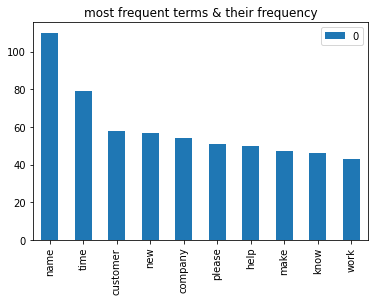

In [120]:
most_freq_terms.plot(kind='bar',title='most frequent terms & their frequency')

In [121]:
# Now we can check for frequent bi-grams:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts1 = co.fit_transform(df.lemmatized_text)
bi_grams=pd.DataFrame(counts1.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)
bi_grams

,0
let know,31
company name,24
look forward,22
subject line,15
please let,12
feel free,10
product name,9
forward hear,9
date time,9
would like,8


<AxesSubplot:title={'center':'bi-grams'}>

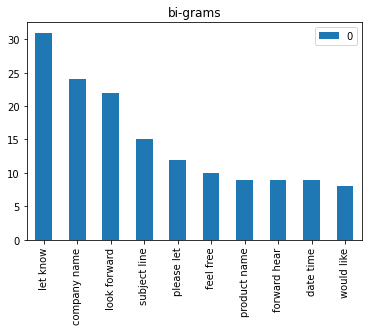

In [122]:
bi_grams.plot(kind='bar',title='bi-grams')

In [123]:
# Now we can check for frequent tri-grams:
co = CountVectorizer(ngram_range=(3,3),stop_words=stops)
counts1 = co.fit_transform(df.lemmatized_text)
tri_grams=pd.DataFrame(counts1.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)
tri_grams

,0
please let know,12
look forward hear,8
email subject line,7
please dont hesitate,5
name amp company,5
feel free contact,5
amp company name,5
please feel free,5
team try offer,4
fail time realize,4


<AxesSubplot:title={'center':'tri-grams'}>

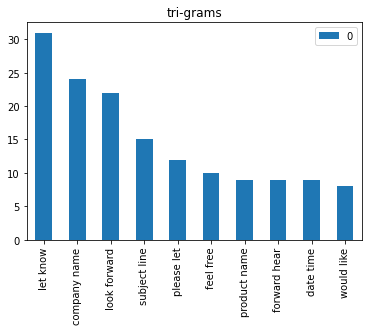

In [124]:
bi_grams.plot(kind='bar',title='tri-grams')

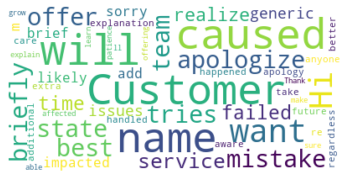

In [125]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
text = df.emails[9]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# bag of words

In [126]:
cv = CountVectorizer() # intializing the count vectorizer
X = cv.fit_transform(df['lemmatized_text']).toarray()


In [127]:
# returns all the unique word from data 

features = cv.get_feature_names()
df_bow = pd.DataFrame(X, columns = features)
df_bow.head()

,abc,ability,able,about,aboutexplain,abouttalking,above,abovebuttonif,absolutely,accept,...,youregardskyle,youregardsyour,youshailene,youtalk,youthank,youthanksanup,youve,youyour,zoe,zoom
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
email ='dear  customer name   thank you for contacting us about your defective  product name   we are truly sorry that it did not work as promised  we also apologize for any inconvenience that this has caused for you  our products go through several quality control checks before they are delivered to customers  however  this one regrettably slipped past those checks and failed to live up to our standards  to make up for this error  we have shipped you a new  product name   which should arrive within 2 5 days  we ve also included a pre labeled box for you to return the defective product once you ve received the replacement  we re also sending a  20 coupon for your next purchase to make up for the inconvenience  we are truly sorry that your original purchase did not live up to your expectations  but we look forward to providing a better experience for you going forward  thanks again for bringing this issue to our attention  and please don t hesitate to contact me directly with any other concerns you may have  sincerely   name   title ' # considering an example query

In [129]:
# checking for stop words

Q=[]
a=email.split()
for i in a:
    if i in stop:
        continue
    else:
        Q.append(i)
    b=" ".join(Q) 

In [130]:
email_lemma = text_normalization(b) # applying the function that we created for text normalizing
email_bow = cv.transform([email_lemma]).toarray() # applying bow

In [131]:
text_normalization

<function __main__.text_normalization(text)>

In [132]:
email_bow

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# similarity

In [133]:
# cosine similarity for the above question we considered.

cosine_value = 1- pairwise_distances(df_bow, email_bow, metric = 'cosine' )
(cosine_value)

array([[0.04359977],
       [0.04563579],
       [0.50194732],
       [0.25485482],
       [0.15078012],
       [0.16900343],
       [0.09390763],
       [0.13029662],
       [0.10585122],
       [0.1090974 ],
       [0.09422857],
       [0.0603849 ],
       [0.03010859],
       [0.05834876],
       [0.05335072],
       [0.10805473],
       [0.06684018],
       [0.0827396 ],
       [0.07876575],
       [0.10181284],
       [0.0631509 ],
       [0.03094211],
       [0.02570872],
       [0.02355714],
       [0.04015579],
       [0.06381534],
       [0.07627393],
       [0.13509396],
       [0.02684914],
       [0.02625525],
       [0.09750956],
       [0.11788742],
       [0.11216127],
       [0.061494  ],
       [0.1902606 ],
       [0.02557687],
       [0.00876317],
       [0.05110997],
       [0.05977555],
       [0.03135305],
       [0.19622098],
       [0.08795779],
       [0.07639154],
       [0.02121745],
       [0.03131121],
       [0.01292719],
       [0.08058662],
       [0.092

In [29]:
df['similarity_bow']=cosine_value # creating a new column 

In [134]:
df_simi = pd.DataFrame(df, columns=['template','similarity_bow']) # taking similarity value of responses for the question we took
df_simi 

,template,similarity_bow
0,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
1,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
2,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
3,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
4,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
...,...,...
128,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",NaN
129,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",NaN
130,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",NaN
131,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",NaN


In [135]:
df_simi_sort = df_simi.sort_values(by='similarity_bow', ascending=False) # sorting the values
df_simi_sort.head()

,template,similarity_bow
0,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
1,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
2,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
3,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN
4,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",NaN


In [136]:
threshold = 0.2 # considering the value of p=smiliarity to be greater than 0.2
df_threshold = df_simi_sort[df_simi_sort['similarity_bow'] > threshold] 
df_threshold

,template,similarity_bow


In [137]:
index_value = cosine_value.argmax() # returns the index number of highest value
index_value 

2

In [138]:
(email)

'dear  customer name   thank you for contacting us about your defective  product name   we are truly sorry that it did not work as promised  we also apologize for any inconvenience that this has caused for you  our products go through several quality control checks before they are delivered to customers  however  this one regrettably slipped past those checks and failed to live up to our standards  to make up for this error  we have shipped you a new  product name   which should arrive within 2 5 days  we ve also included a pre labeled box for you to return the defective product once you ve received the replacement  we re also sending a  20 coupon for your next purchase to make up for the inconvenience  we are truly sorry that your original purchase did not live up to your expectations  but we look forward to providing a better experience for you going forward  thanks again for bringing this issue to our attention  and please don t hesitate to contact me directly with any other concern

In [139]:
df['template'].loc[index_value] # The text at the above index becomes the response for the question

'APOLOGY TO CUSTOMERS:Hi [Customer name],\nI want to apologize for [briefly state mistake]. Our team tries to offer the best service, but we failed this time. I realize we [state briefly the impact your mistake had on the customer] and I’m very sorry. This was likely caused by [add brief explanation], but, regardless, we should have handled this better. We’re all aware of what happened and will take extra care in future. As an additional apology, we’re sending you [offering]. While we know it can’t exactly make up for the inconvenience we caused, we hope it’ll go some way towards making amends.\nThank you for your patience. Let me know if I can help in any way.\n[Your name]'

# tf-idf

In [140]:
email1 ="dear  customer name   thank you for contacting us about your defective  product name   we are truly sorry that it did not work as promised  we also apologize for any inconvenience that this has caused for you  our products go through several quality control checks before they are delivered to customers  however  this one regrettably slipped past those checks and failed to live up to our standards  to make up for this error  we have shipped you a new  product name   which should arrive within 2 5 days  we ve also included a pre labeled box for you to return the defective product once you ve received the replacement  we re also sending a  20 coupon for your next purchase to make up for the inconvenience  we are truly sorry that your original purchase did not live up to your expectations  but we look forward to providing a better experience for you going forward  thanks again for bringing this issue to our attention  and please don t hesitate to contact me directly with any other concerns you may have  sincerely   name   title"

In [141]:
# using tf-idf

tfidf=TfidfVectorizer() # intializing tf-id 
x_tfidf=tfidf.fit_transform(df['lemmatized_text']).toarray() # transforming the data into array

In [142]:
 email_lemma1 = text_normalization(email1)
email_tfidf = tfidf.transform([email_lemma1]).toarray() # applying tf-idf

In [143]:
# returns all the unique word from data with a score of that word

df_tfidf=pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names()) 
df_tfidf.head()

,abc,ability,able,about,aboutexplain,abouttalking,above,abovebuttonif,absolutely,accept,...,youregardskyle,youregardsyour,youshailene,youtalk,youthank,youthanksanup,youve,youyour,zoe,zoom
0,0.0,0.0,0.058554,0.034635,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.037741,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.088335,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# similarity

In [144]:
cos=1-pairwise_distances(df_tfidf,email_tfidf,metric='cosine')  # applying cosine similarity
cos

array([[0.22562377],
       [0.14536986],
       [0.94564635],
       [0.3992739 ],
       [0.39406259],
       [0.40102379],
       [0.23183202],
       [0.3007127 ],
       [0.20667545],
       [0.23418891],
       [0.12947258],
       [0.2362081 ],
       [0.10755338],
       [0.26324402],
       [0.19147438],
       [0.30990976],
       [0.21796565],
       [0.3446628 ],
       [0.15134441],
       [0.19520163],
       [0.14637579],
       [0.11885346],
       [0.13235736],
       [0.0812292 ],
       [0.11595002],
       [0.12594353],
       [0.18257583],
       [0.22085108],
       [0.1288302 ],
       [0.08370154],
       [0.17728642],
       [0.15366919],
       [0.16835032],
       [0.09133641],
       [0.1446086 ],
       [0.15618497],
       [0.17181905],
       [0.16090885],
       [0.16113645],
       [0.14919291],
       [0.18044788],
       [0.12251437],
       [0.19313943],
       [0.18774906],
       [0.1121998 ],
       [0.16551069],
       [0.18649185],
       [0.160

In [145]:
df['similarity_tfidf']=cos # creating a new column 
df_simi_tfidf = pd.DataFrame(df, columns=['template','similarity_tfidf']) # taking similarity value of responses for the question we took
df_simi_tfidf 

,template,similarity_tfidf
0,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.225624
1,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.145370
2,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.945646
3,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.399274
4,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.394063
...,...,...
128,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",0.152350
129,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",0.086756
130,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",0.130147
131,"REVIEW/FEEDBACK REQUEST:Hey [customer name],\n...",0.212836


In [146]:
df_simi_tfidf_sort = df_simi_tfidf.sort_values(by='similarity_tfidf', ascending=False) # sorting the values
df_simi_tfidf_sort.head(10)

,template,similarity_tfidf
2,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.945646
5,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.401024
3,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.399274
4,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.394063
17,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.344663
15,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.309910
7,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.300713
80,"POST INTERVIEW THANKS:Hi [Interviewer Name],\n...",0.272901
13,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.263244
83,PRODUCT LAUNCH ANNOUNCEMENT:Dear [name]\n\nThe...,0.243958


In [147]:
threshold = 0.2 # considering the value of p=smiliarity to be greater than 0.2
df_threshold = df_simi_tfidf_sort[df_simi_tfidf_sort['similarity_tfidf'] > threshold] 
df_threshold

,template,similarity_tfidf
2,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.945646
5,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.401024
3,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.399274
4,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.394063
17,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.344663
15,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.309910
7,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.300713
80,"POST INTERVIEW THANKS:Hi [Interviewer Name],\n...",0.272901
13,"APOLOGY TO CUSTOMERS:Hi [Customer name],\nI wa...",0.263244
83,PRODUCT LAUNCH ANNOUNCEMENT:Dear [name]\n\nThe...,0.243958


In [148]:
index_value1 = cos.argmax() # returns the index number of highest value
index_value1

2

In [149]:
email1

'dear  customer name   thank you for contacting us about your defective  product name   we are truly sorry that it did not work as promised  we also apologize for any inconvenience that this has caused for you  our products go through several quality control checks before they are delivered to customers  however  this one regrettably slipped past those checks and failed to live up to our standards  to make up for this error  we have shipped you a new  product name   which should arrive within 2 5 days  we ve also included a pre labeled box for you to return the defective product once you ve received the replacement  we re also sending a  20 coupon for your next purchase to make up for the inconvenience  we are truly sorry that your original purchase did not live up to your expectations  but we look forward to providing a better experience for you going forward  thanks again for bringing this issue to our attention  and please don t hesitate to contact me directly with any other concern

In [150]:
df['template'].loc[index_value1]  # returns the text at that index

'APOLOGY TO CUSTOMERS:Hi [Customer name],\nI want to apologize for [briefly state mistake]. Our team tries to offer the best service, but we failed this time. I realize we [state briefly the impact your mistake had on the customer] and I’m very sorry. This was likely caused by [add brief explanation], but, regardless, we should have handled this better. We’re all aware of what happened and will take extra care in future. As an additional apology, we’re sending you [offering]. While we know it can’t exactly make up for the inconvenience we caused, we hope it’ll go some way towards making amends.\nThank you for your patience. Let me know if I can help in any way.\n[Your name]'

# Model Using Bag of Words

In [151]:
# Function that removes stop words and process the text

def stopword_(text):   
    tag_list=pos_tag(nltk.word_tokenize(text),tagset=None)
    stop=stopwords.words('english')
    lema=wordnet.WordNetLemmatizer()
    lema_word=[]
    for token,pos_token in tag_list:
        if token in stop:
            continue
        if pos_token.startswith('V'):
            pos_val='v'
        elif pos_token.startswith('J'):
            pos_val='a'
        elif pos_token.startswith('R'):
            pos_val='r'
        else:
            pos_val='n'
        lema_token=lema.lemmatize(token,pos_val)
        lema_word.append(lema_token)
    return " ".join(lema_word) 

In [152]:
# defining a function that returns response to query using bow

def email_bow(text):
    s=stopword_(text)
    lemma=text_normalization(s) # calling the function to perform text normalization
    bow=cv.transform([lemma]).toarray() # applying bow
    cosine_value = 1- pairwise_distances(df_bow,bow, metric = 'cosine' )
    index_value=cosine_value.argmax() # getting index value 
    return df['template'].loc[index_value]

In [153]:
email_bow("discount")

'SALES/DISCOUNT OFFER:Hi [name],\n\nIt’s a great time for shopping! \n\n[time frame: e.g., Today only, Until July 24th], all items in the store are X% off!\n\nDon’t hesitate – the best deals are selling out fast!\n\nJust use the discount code below at checkout:\n\n[code]\n\nHappy shopping,\n[company name]'

In [154]:
email_bow('meeting invitation')

'REQUEST FOR MEETING:Dear [Recipient Name]\nI am writing to request a meeting with you to discuss [topic/topics to discuss]. Please tell me your available dates and timings and I will adjust accordingly.\nI appreciate your consideration and hope to meet you soon. Thank you for your time.\nBest Regards'

In [155]:
email_bow('password reset')

'PASSWORD RESET:Hi [name],\n\nThere was a request to change your password!\n\nIf you did not make this request then please ignore this email.\n\nOtherwise, please click this link to change your password: [link]'

In [156]:
email_bow('coffee')

'INVITATION TO MEETING:Hello <invitee group>,\n\nI hope this email finds you well. I’m writing to invite you to a meeting on <day and date> at <time> to discuss <topic>. \n\nThe meeting will take place at/on <location/videoconference platform> and will last approximately <number> hours. An agenda for the meeting is attached. The most important topics for discussion include:                   <agenda item 1>\n\n<agenda item 2>\n\n<agenda item 3>                                                                                                   Please click this link to confirm whether or not you will be able to attend. We ask that you reply no later than <date and time> so we can plan effectively. \n\nRegards,\n\n<Your name>\n\n<Your role and contact info>\n\n<Company name>'

In [157]:
email_bow('post interview thanks')

'POST INTERVIEW THANKS:Hi [Interviewer Name],\n\nThank you so much for meeting with me today. It was such a pleasure to learn more about the team and position, and I’m very excited about the opportunity to join [Company Name] and help [bring in new clients/develop world-class content/anything else awesome you would be doing] with your team.\n\nI look forward to hearing from you about the next steps in the hiring process, and please do not hesitate to contact me if I can provide additional information.\n\nBest regards,\n[Your Name]'

In [158]:
email_bow('promotion')

'JOB PROMOTION ANNOUNCEMENT:Subject: Firstname Lastname - New Position\n\nI am pleased to announce the promotion of [Firstname Lastname] from [Old Position] to [New Position]. [Firstname] has been with [Name of Company] for [X years] and has worked in [insert Names of Departments/Positions]. S/he will be gaining these new responsibilities [list].\n\n[Firstname] attended [Name of University] and came to [Name of Company] after graduation.\n\nDuring her/his tenure here, [Firstname] has implemented protocols which have improved efficiency in the [Name of departments] and has frequently been recognized for outstanding achievement.\n\nPlease join me in congratulating [Firstname] on [her/his] promotion and welcoming her/him to the New Department/Position.\n\nWarm Regards,\n\nYour Name\n\nTitle'

In [159]:
email_bow('product')

'PRODUCT LAUNCH ANNOUNCEMENT:Dear [name]\n\nThe new [product name] is finally here!\n\nWhat makes the [product name] different is [give an introduction to the product and why people may want to buy it]\n\nYou can order your [product name] directly from our webstore or find it on Amazon.\n\n[Only add offer if needed] The first 100 people that make an order will receive free shipping.\n\n[Add CTA button]'

# Model Using tf-idf

In [160]:
# defining a function that returns response to query using tf-idf

def email_tfidf(text):
    lemma=text_normalization(text) # calling the function to perform text normalization
    tf=tfidf.transform([lemma]).toarray() # applying tf-idf
    cos=1-pairwise_distances(df_tfidf,tf,metric='cosine') # applying cosine similarity
    index_value=cos.argmax() # getting index value 
    return df['template'].loc[index_value]

In [161]:
email_tfidf('discount')

'SALES/DISCOUNT OFFER:Hi [name],\n\nIt’s a great time for shopping! \n\n[time frame: e.g., Today only, Until July 24th], all items in the store are X% off!\n\nDon’t hesitate – the best deals are selling out fast!\n\nJust use the discount code below at checkout:\n\n[code]\n\nHappy shopping,\n[company name]'

In [162]:
email_tfidf('promotion')

'JOB PROMOTION ANNOUNCEMENT:Subject: Firstname Lastname - New Position\n\nI am pleased to announce the promotion of [Firstname Lastname] from [Old Position] to [New Position]. [Firstname] has been with [Name of Company] for [X years] and has worked in [insert Names of Departments/Positions]. S/he will be gaining these new responsibilities [list].\n\n[Firstname] attended [Name of University] and came to [Name of Company] after graduation.\n\nDuring her/his tenure here, [Firstname] has implemented protocols which have improved efficiency in the [Name of departments] and has frequently been recognized for outstanding achievement.\n\nPlease join me in congratulating [Firstname] on [her/his] promotion and welcoming her/him to the New Department/Position.\n\nWarm Regards,\n\nYour Name\n\nTitle'

In [163]:
email_tfidf('announcement')

'JOB PROMOTION ANNOUNCEMENT:Subject: Firstname Lastname - New Position\n\nI am pleased to announce the promotion of [Firstname Lastname] from [Old Position] to [New Position]. [Firstname] has been with [Name of Company] for [X years] and has worked in [insert Names of Departments/Positions]. S/he will be gaining these new responsibilities [list].\n\n[Firstname] attended [Name of University] and came to [Name of Company] after graduation.\n\nDuring her/his tenure here, [Firstname] has implemented protocols which have improved efficiency in the [Name of departments] and has frequently been recognized for outstanding achievement.\n\nPlease join me in congratulating [Firstname] on [her/his] promotion and welcoming her/him to the New Department/Position.\n\nWarm Regards,\n\nYour Name\n\nTitle'

In [164]:
email_tfidf('password')

'PASSWORD RESET:Hi [name],\n\nThere was a request to change your password!\n\nIf you did not make this request then please ignore this email.\n\nOtherwise, please click this link to change your password: [link]'

In [165]:
email_tfidf('thankyou')

'APOLOGY TO CUSTOMERS:Hi [Customer name],\nI want to apologize for [briefly state mistake]. Our team tries to offer the best service, but we failed this time. I realize we [state briefly the impact your mistake had on the customer] and I’m very sorry. This was likely caused by [add brief explanation], but, regardless, we should have handled this better. We’re all aware of what happened and will take extra care in future. As an additional apology, we’re sending you [offering]. While we know it can’t exactly make up for the inconvenience we caused, we hope it’ll go some way towards making amends.\nThank you for your patience. Let me know if I can help in any way.\n[Your name]'

In [166]:
email_tfidf('interview')

'POST INTERVIEW THANKS:Hi [Interviewer Name],\n\nThank you so much for meeting with me today. It was such a pleasure to learn more about the team and position, and I’m very excited about the opportunity to join [Company Name] and help [bring in new clients/develop world-class content/anything else awesome you would be doing] with your team.\n\nI look forward to hearing from you about the next steps in the hiring process, and please do not hesitate to contact me if I can provide additional information.\n\nBest regards,\n[Your Name]'

In [167]:
email_tfidf('invitation')

'INVITATION TO MEETING:Hello <invitee group>,\n\nI hope this email finds you well. I’m writing to invite you to a meeting on <day and date> at <time> to discuss <topic>. \n\nThe meeting will take place at/on <location/videoconference platform> and will last approximately <number> hours. An agenda for the meeting is attached. The most important topics for discussion include:                   <agenda item 1>\n\n<agenda item 2>\n\n<agenda item 3>                                                                                                   Please click this link to confirm whether or not you will be able to attend. We ask that you reply no later than <date and time> so we can plan effectively. \n\nRegards,\n\n<Your name>\n\n<Your role and contact info>\n\n<Company name>'

In [168]:
email_tfidf('sorry')

'APOLOGY TO CUSTOMERS:Hi [Customer name],\nI want to apologize for [briefly state mistake]. Our team tries to offer the best service, but we failed this time. I realize we [state briefly the impact your mistake had on the customer] and I’m very sorry. This was likely caused by [add brief explanation], but, regardless, we should have handled this better. We’re all aware of what happened and will take extra care in future. As an additional apology, we’re sending you [offering]. While we know it can’t exactly make up for the inconvenience we caused, we hope it’ll go some way towards making amends.\nThank you for your patience. Let me know if I can help in any way.\n[Your name]'

In [169]:
email_tfidf('experiences')

'POST INTERVIEW THANKS:Hi [Interviewer Name],\n\nThank you so much for meeting with me today. It was such a pleasure to learn more about the team and position, and I’m very excited about the opportunity to join [Company Name] and help [bring in new clients/develop world-class content/anything else awesome you would be doing] with your team.\n\nI look forward to hearing from you about the next steps in the hiring process, and please do not hesitate to contact me if I can provide additional information.\n\nBest regards,\n[Your Name]'

In [170]:
email_tfidf("invitation")

'INVITATION TO MEETING:Hello <invitee group>,\n\nI hope this email finds you well. I’m writing to invite you to a meeting on <day and date> at <time> to discuss <topic>. \n\nThe meeting will take place at/on <location/videoconference platform> and will last approximately <number> hours. An agenda for the meeting is attached. The most important topics for discussion include:                   <agenda item 1>\n\n<agenda item 2>\n\n<agenda item 3>                                                                                                   Please click this link to confirm whether or not you will be able to attend. We ask that you reply no later than <date and time> so we can plan effectively. \n\nRegards,\n\n<Your name>\n\n<Your role and contact info>\n\n<Company name>'

In [171]:
df['category_id'] = df['template'].factorize()[0]
from io import StringIO
category_id_df = df[['template', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'template']].values)

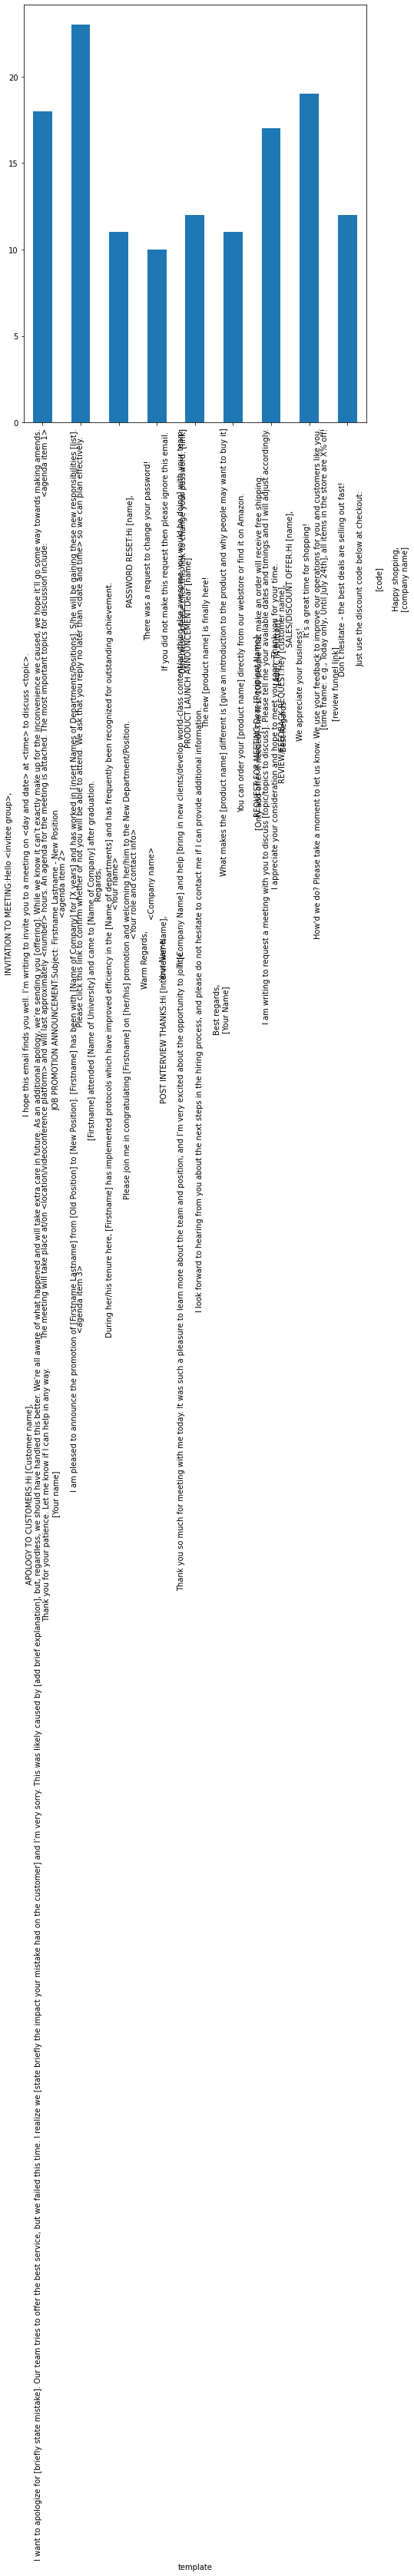

In [172]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,10))
df.groupby('template').lemmatized_text.count().plot.bar(ylim=0)
plt.show()

In [173]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.lemmatized_text).toarray()
labels = df.category_id
features.shape

(133, 260)

In [174]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for template, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(template))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'APOLOGY TO CUSTOMERS:Hi [Customer name],
I want to apologize for [briefly state mistake]. Our team tries to offer the best service, but we failed this time. I realize we [state briefly the impact your mistake had on the customer] and I’m very sorry. This was likely caused by [add brief explanation], but, regardless, we should have handled this better. We’re all aware of what happened and will take extra care in future. As an additional apology, we’re sending you [offering]. While we know it can’t exactly make up for the inconvenience we caused, we hope it’ll go some way towards making amends.
Thank you for your patience. Let me know if I can help in any way.
[Your name]':
  . Most correlated unigrams:
       . apology
       . sorry
  . Most correlated bigrams:
       . team try
       . want apologize
  . Most correlated trigrams:
       . 
# 'INVITATION TO MEETING:Hello <invitee group>,

I hope this email finds you well. I’m writing to invite you to a meeting on <day and date> at 

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['template'],test_size=0.26, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [176]:
X_train.shape

(98,)

In [177]:
X_test.shape

(35,)

In [178]:
X_train_tfidf.shape

(98, 1671)

In [179]:
X_test_tfidf.shape

(35, 864)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [181]:
a=df['lemmatized_text']
b=df['template']
x = df['lemmatized_text']
y = df['template']
vect = CountVectorizer()

In [182]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.22,random_state=42)
x_train_dtm = vect.fit_transform(x_train1)
x_test_dtm = vect.transform(x_test1)

In [183]:
NB = MultinomialNB()
NB.fit(x_train_dtm,y_train1)
y_predict = NB.predict(x_test_dtm)
NB_acc = metrics.accuracy_score(y_test1,y_predict)
NB_acc

0.7333333333333333

In [184]:
from sklearn.linear_model import LinearRegression 
lm = SGDClassifier()
lm.fit(x_train_dtm,y_train1)
lm_predict = lm.predict(x_test_dtm)
SGD_acc= metrics.accuracy_score(y_test1,lm_predict)
SGD_acc

0.7666666666666667

In [185]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train1)
rf_predict = rf.predict(x_test_dtm)
Random_acc = metrics.accuracy_score(y_test1,rf_predict)
Random_acc

0.6333333333333333

In [186]:
xg = XGBClassifier()
xg.fit(x_train_dtm,y_train1)
xg_predict = xg.predict(x_test_dtm)
xg_acc = metrics.accuracy_score(y_test1,xg_predict)
xg_acc

C:\Users\yy\Anaconda3\envs\nenv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6333333333333333

In [187]:
pg = PassiveAggressiveClassifier()
pg.fit(x_train_dtm,y_train1)
pg_predict = pg.predict(x_test_dtm)
pg_acc = metrics.accuracy_score(y_test1,pg_predict)
pg_acc

0.6666666666666666

In [188]:
lv = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', tol=0.0001,
     verbose=0)
lv.fit(x_train_dtm,y_train1)
lv_predict = lv.predict(x_test_dtm)
lv_acc= metrics.accuracy_score(y_test1,lv_predict)
lv_acc

0.7333333333333333

In [189]:
df = {'Model':['MultinomialNB','SGDClassifier','RandomForestClassifier','XGBClassifier', 'PassiveAggressiveClassifier','LinearSVC'],'Accuracy':[NB_acc, SGD_acc,Random_acc,xg_acc,pg_acc,lv_acc]}

In [190]:
df_model = pd.DataFrame(df)
df_model.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
1,SGDClassifier,0.766667
0,MultinomialNB,0.733333
5,LinearSVC,0.733333
4,PassiveAggressiveClassifier,0.666667
2,RandomForestClassifier,0.633333
3,XGBClassifier,0.633333


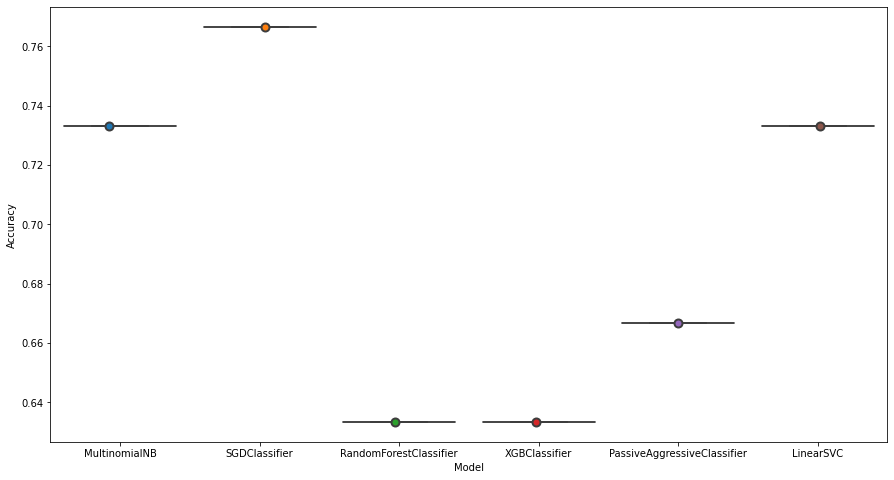

In [191]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y='Accuracy', data=df_model)
sns.stripplot(x='Model', y='Accuracy', data=df_model, 
              size=8, jitter=True, edgecolor="gray", linewidth=2,)
plt.show()


<AxesSubplot:xlabel='Model'>

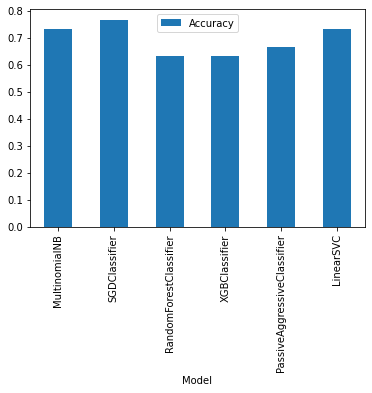

In [192]:
df_model.plot(x="Model", y="Accuracy", kind="bar")

In [194]:
from sklearn.metrics import confusion_matrix
model = PassiveAggressiveClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.22, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.template.values, yticklabels=category_id_df.template.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AttributeError: 'dict' object has no attribute 'index'

In [99]:
X = count_vect.fit_transform(a)
Y = tfidf_transformer.fit_transform(X)

In [100]:
classifier=LinearSVC().fit(Y, b)

In [101]:
print(classifier.predict(count_vect.transform(["apology"])))

['APOLOGY TO CUSTOMERS:Hi [Customer name],\nI want to apologize for [briefly state mistake]. Our team tries to offer the best service, but we failed this time. I realize we [state briefly the impact your mistake had on the customer] and I’m very sorry. This was likely caused by [add brief explanation], but, regardless, we should have handled this better. We’re all aware of what happened and will take extra care in future. As an additional apology, we’re sending you [offering]. While we know it can’t exactly make up for the inconvenience we caused, we hope it’ll go some way towards making amends.\nThank you for your patience. Let me know if I can help in any way.\n[Your name]']


In [102]:
print(classifier.predict(count_vect.transform(["announcement"])))

["REVIEW/FEEDBACK REQUEST:Hey [customer name],\n\nWe appreciate your business!\n\nHow'd we do? Please take a moment to let us know. We use your feedback to improve our operations for you and customers like you.\n\n[review funnel link]"]


In [103]:
print(classifier.predict(count_vect.transform(["interview"])))

['POST INTERVIEW THANKS:Hi [Interviewer Name],\n\nThank you so much for meeting with me today. It was such a pleasure to learn more about the team and position, and I’m very excited about the opportunity to join [Company Name] and help [bring in new clients/develop world-class content/anything else awesome you would be doing] with your team.\n\nI look forward to hearing from you about the next steps in the hiring process, and please do not hesitate to contact me if I can provide additional information.\n\nBest regards,\n[Your Name]']


In [104]:
import pickle

In [105]:
classifier=LinearSVC().fit(Y, b)

vector_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vector_file, 'wb'))

mod_file = 'classification.model'
pickle.dump(classifier, open(mod_file, 'wb'))

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    SVC(kernel='linear',probability=True),
    MultinomialNB(),
   GaussianNB(),
    LogisticRegression(random_state=0),
    #LogisticRegressionCV(penalty='l1', solver='saga'),
    #LogisticRegressionCV(penalty='l2', solver='saga'),
    DecisionTreeClassifier(criterion='gini'),
    KNeighborsClassifier(n_neighbors=17)]
   #AdaBoostClassifier(n_estimators=10)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=3)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()


cv_df.groupby("model_name").accuracy.mean()

# final model building

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.22, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf, y_train)

print(clf.predict(count_vect.transform(["apology"])))

classifier = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.22, random_state=0)
clf=classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print(clf.predict(count_vect.transform(["apology"])))

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC



# Train the classification model
def train_model():
    df = pd.read_excel(r"C:\Users\lenovo\Desktop\group4dataset.xlsx")

    X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['template'], random_state=0)

    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(X_train)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    model = LinearSVC().fit(X_train_tfidf, y_train)

In [610]:
print(model.predict(count_vect.transform(["apology"])))

NotFittedError: This PassiveAggressiveClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.